In [1]:
import numpy as np
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels, Point
import copy

importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)
importlib.reload(Point)

<module 'Point' from 'D:\\netSVG\\Point.py'>

In [2]:
import os
dataset_config = config.DatasetConfig(scenario="functional", n_instance=1000)

assert(dataset_config.scenario == "functional" 
      )
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/functional already exists replacing files in this notebook


In [3]:
X_test,Y_test = dataset.get_functional_test_data()

In [4]:
X_train,Y_train = dataset.get_functional_train_data()

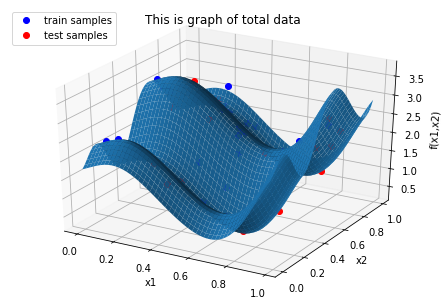

In [5]:
exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.0001, dec_gen=0, lr_disc=0.001, optim_gen="Adam", 
                             optim_disc="Adam", z_input_size=1),
    training=config.TrainingConfig(n_epochs=2000, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1)
)

plotting.plot_front(X_train, Y_train, X_test, Y_test, exp_config, fig_dir)

In [6]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[-1.08468  0.09633]
normal coefficient: 
2.44233
Standardized regression coefficient: 
[-0.36156  0.0381 ]
normal coefficient: 
-0.0


In [7]:
imp = sample.get_importance(coef,Y_train)

y std:
0.71508
The importance for every dimension:
[0.50562 0.05328]


In [8]:
length = sample.get_sample_length(X_train,imp)

Euclidean distance in x domain：
[[0.000e+00 1.700e-02 3.370e-01 4.030e-01 1.480e-01 1.770e-01 3.840e-01
  1.300e-02 1.510e-01 4.000e-02 2.850e-01 5.100e-01 2.270e-01 3.410e-01
  7.900e-02 2.190e-01 3.800e-02 3.130e-01 6.130e-01 1.110e-01 5.500e-02
  1.200e-02 1.950e-01 1.730e-01 2.770e-01 1.920e-01 2.460e-01 2.250e-01
  3.960e-01 1.180e-01]
 [1.700e-02 0.000e+00 3.610e-01 5.740e-01 8.200e-02 2.710e-01 5.270e-01
  5.800e-02 1.730e-01 5.500e-02 4.090e-01 6.490e-01 3.280e-01 5.010e-01
  1.650e-01 3.140e-01 1.060e-01 4.710e-01 7.250e-01 1.090e-01 1.310e-01
  4.000e-02 1.150e-01 2.710e-01 3.700e-01 3.110e-01 3.690e-01 2.520e-01
  5.480e-01 1.430e-01]
 [3.370e-01 3.610e-01 0.000e+00 9.800e-01 7.540e-01 8.420e-01 1.140e+00
  3.210e-01 9.360e-01 1.450e-01 9.930e-01 1.445e+00 9.500e-01 4.120e-01
  5.020e-01 9.560e-01 3.780e-01 7.940e-01 1.732e+00 7.600e-02 4.480e-01
  4.650e-01 8.320e-01 8.100e-01 1.106e+00 2.730e-01 8.890e-01 1.108e+00
  1.125e+00 8.490e-01]
 [4.030e-01 5.740e-01 9.800e-01 0.0

In [9]:
x_min = np.amin(X_train, axis=0)
x_max = np.amax(X_train, axis=0)
L = sample.get_x_len(x_min, x_max)

The value area of x in the sample is between 0.0148 and 0.9764in the dimension of No. 0
The value area of x in the sample is between 0.07 and 0.9869in the dimension of No. 1
The full length of every dimension:
[0.9616 0.9169]


In [10]:
n_sample,length = sample.divide_sample(length, L)

The number of diversions of the 0th dimension is: 102
102
The number of diversions of the 1th dimension is: 917
917
总的样方分割数为：
93534
The number of diversions of the 0th dimension is: 85
85
The number of diversions of the 1th dimension is: 765
765
总的样方分割数为：
65025
The number of diversions of the 0th dimension is: 71
71
The number of diversions of the 1th dimension is: 637
637
总的样方分割数为：
45227
The number of diversions of the 0th dimension is: 59
59
The number of diversions of the 1th dimension is: 531
531
总的样方分割数为：
31329
The number of diversions of the 0th dimension is: 49
49
The number of diversions of the 1th dimension is: 443
443
总的样方分割数为：
21707
The number of diversions of the 0th dimension is: 41
41
The number of diversions of the 1th dimension is: 369
369
总的样方分割数为：
15129
The number of diversions of the 0th dimension is: 34
34
The number of diversions of the 1th dimension is: 308
308
总的样方分割数为：
10472
The number of diversions of the 0th dimension is: 29
29
The number of diversions of the 

In [11]:
dim = len(X_train[0])
gen_x = sample.gen_x_center(dim,length,n_sample, x_min)

第0维度，最小的x为0.0148
第0维度的中心值有：
[0.16639, 0.46958, 0.77277, 1.07595]
第1维度，最小的x为0.07
第1维度的中心值有：
[0.08597, 0.11792, 0.14987, 0.18182, 0.21377, 0.24571, 0.27766, 0.30961, 0.34156, 0.37351, 0.40545, 0.4374, 0.46935, 0.5013, 0.53325, 0.56519, 0.59714, 0.62909, 0.66104, 0.69299, 0.72493, 0.75688, 0.78883, 0.82078, 0.85273, 0.88467, 0.91662, 0.94857, 0.98052]


In [12]:
gen_sample_point = sample.gen_product(gen_x)
#print("样方中心点：")
gen_sample_point = np.array(gen_sample_point)
#print(gen_sample_point)

In [13]:
xlimit = []
for index in range(len(n_sample)):
    l = []
    for i in range(n_sample[index]):
        x = x_min[index] + i * length[index]
        l.append(x)
    l.append(x_min[index] + n_sample[index] * length[index])
    xlimit.append(l)

In [14]:
sample_list = []
xlim_list = []

In [15]:
x_value = []
for index in range(dim):
    xl = []
    for i in range(len(X_train)):
        x = X_train[i][index]
        r = 0
        for xi in xl:
            if xi == x:
                r = 1
        if r == 0:
            xl.append(x)
    x_value.append(xl)
    
x_value_ori = copy.deepcopy(x_value)

In [16]:
XLim.con_s(gen_sample_point, sample_list, dim, xlimit)

In [17]:
'''QuickHull
计算原始样本点围成的最大闭包图形
筛选处于闭包图形中的样方，样方的各个维度最大最小值，有一个处于闭包图形中，即算样方处于其中
此时得到的sample_list是经过筛选的
'''

'QuickHull\n计算原始样本点围成的最大闭包图形\n筛选处于闭包图形中的样方，样方的各个维度最大最小值，有一个处于闭包图形中，即算样方处于其中\n此时得到的sample_list是经过筛选的\n'

In [18]:
XLim.con_sample(xlim_list, length, x_min, dim, n_sample)

In [19]:
XLim.sample_feature(xlim_list, sample_list, x_value)

In [20]:
gen_x_cross = sample.gen_product(x_value)

In [21]:
sample.cross_point_del(gen_x_cross, X_train)

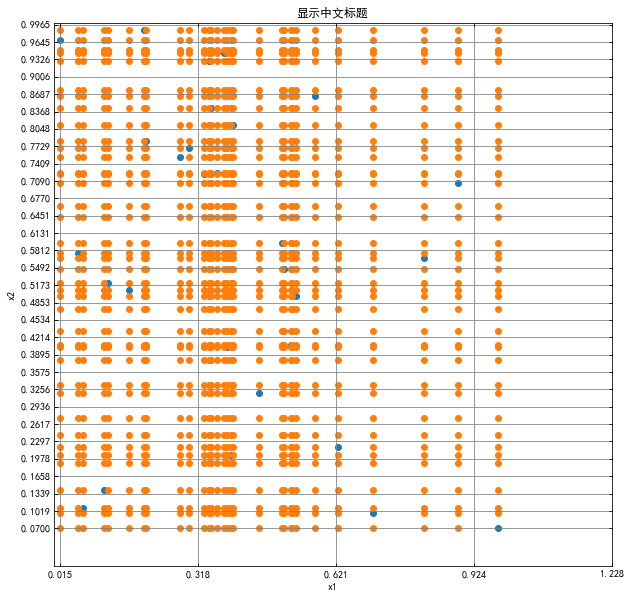

In [22]:
gen_x_cross = np.array(gen_x_cross)
plotting.plot_genx(X_train, gen_x_cross, length, n_sample, exp_config, fig_dir, xlimit)

In [23]:
XLim.xl_attri(xlim_list, X_train, gen_x_cross)
XLim.sample_attri(sample_list, X_train, gen_x_cross, Y_train)
XLim.add_xvalue(xlim_list)

In [24]:
import GPy

noise = 1
length_ = 1

run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=2, variance=noise, lengthscale=length_)
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel)
if run_hyperopt_search:
    gpr.optimize(messages=True) 

In [25]:
gen_y_cross, cov_train_cross = gpr.predict(np.array(gen_x_cross))

In [26]:
XLim.add_y(sample_list, gpr)
print("over")

over


In [27]:
point_list = []
Point.con_point(gen_x_cross, gen_y_cross, point_list)

In [28]:
for sample in sample_list:
    for index in range(len(sample.gen_xlist)):
        for point in point_list:
            r = -1
            for i in range(dim):
                if point.x[i] != sample.gen_xlist[index][i]:
                    r = 0
                    break
            if r == -1:
                sample.points.append(point)

In [29]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2960
Model:                       QuantReg   Bandwidth:                       1.146
Method:                 Least Squares   Sparsity:                        2.326
Date:                Wed, 02 Sep 2020   No. Observations:                   30
Time:                        22:56:21   Df Residuals:                       27
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5650      0.695      3.692      0.001       1.140       3.990
x1            -2.8775      0.796     -3.617      0.001      -4.510      -1.245
x2             0.0942      0.791      0.119      0.906      -1.528       1.717


In [30]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=  4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))

 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


0.05	1.5307	[-2.1743  0.736 ]
0.15	2.5677	[-3.2895  0.3183]
0.25	2.547	[-2.864   0.2543]
0.35	2.525	[-2.1032 -0.0023]
0.45	2.5091	[-2.1013  0.1458]
0.55	2.4922	[-0.7705  0.2478]
0.65	2.4692	[-0.5318  0.2228]
0.75	2.7868	[-0.4381 -0.1179]
0.85	3.899	[-1.086  -1.1141]
0.95	3.4968	[-0.731 -0.319]
2.442331164960009
-1.0846771586848056
0.09632890094793461


In [31]:
y_quantile = [0.691, 1.084, 1.592, 1.803, 2.194, 2.365, 2.440, 2.574, 2.670, 3.239]

In [35]:
vir_xpoint = []
vir_ypoint = []

for xv in x_value:
    xv.sort()
for xv in x_value_ori:
    xv.sort()

In [33]:
import QRselection
import importlib
importlib.reload(QRselection)


#QRselection.qr_selection(xlim_list, models, vir_xpoint, vir_ypoint,y_quantile, gen_x_cross, ols)

<module 'QRselection' from 'D:\\netSVG\\QRselection.py'>

In [34]:
#plotting.plot_genx(X_train, gen_x_cross, np.array(vir_xpoint), length, n_sample)


